# Load package, preppare data

In [6]:
R.version.string
getwd()
library('dplyr')
library("DESeq2")
library('stringr')
library('EnhancedVolcano')
library('pheatmap')
library("vsn")
library('tidyr')
library('ggplot2')
library(grid)
library(gridExtra)
library(ggh4x)


[1] "R version 4.2.2 (2022-10-31)"

[1] "/media/HDD2/donghui/Pathogen_JC14_3DM"

In [7]:
# Read the xlsx file
map_id_name <- readxl::read_excel("../gene_table_and_other_scripts/gene_table.xlsx")
map_id_name <- map_id_name %>% mutate(gene_name = gene_name %>% str_remove("'"))
sample_n(map_id_name, 2)

gene_id,gene_name
<chr>,<chr>
AT5G25230,AT5G25230
AT5G04090,AT5G04090


In [8]:
source('../gene_table_and_other_scripts/theme_Publication.R')

### sample data

In [11]:
sample_data = readxl::read_excel("./refs//3-DM_shoots_root_JC14_adr1s_pathogen.xlsx") %>% as.data.frame
rownames(sample_data) <- sample_data$short_name 
sample_data

,short_name,sample_Names,genotype,tissue,DM,DAS,accession,media,replicate,Bam_name,ERS,ERR,group1,group2,group3,hpi,treatment,batch2
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>
DM1/DM2d_1,DM1/DM2d_1,DM1/DM2d_Shoot_1,DM,Shoot,DM1/DM2d,12,Col-0,1/2MS,1,DM2_SHOO,NA,NA,DM1/DM2d_Shoot,DM1/DM2d,DM1/DM2d,0,control,1
Col-0_12_1,Col-0_12_1,Col-0_Shoot_1,WT,Shoot,WT,12,Col-0,1/2MS,1,COL4_SHO,NA,NA,Col-0_Shoot,Col-0_12,Col-0_12,0,control,1
DM1/DM2d_2,DM1/DM2d_2,DM1/DM2d_Shoot_2,DM,Shoot,DM1/DM2d,12,Col-0,1/2MS,2,DM6_SHOO,NA,NA,DM1/DM2d_Shoot,DM1/DM2d,DM1/DM2d,0,control,1
Col-0_12_2,Col-0_12_2,Col-0_Shoot_2,WT,Shoot,WT,12,Col-0,1/2MS,2,COL8_SHO,NA,NA,Col-0_Shoot,Col-0_12,Col-0_12,0,control,1
DM1/DM2d_3,DM1/DM2d_3,DM1/DM2d_Shoot_3,DM,Shoot,DM1/DM2d,12,Col-0,1/2MS,3,DM14_SHO,NA,NA,DM1/DM2d_Shoot,DM1/DM2d,DM1/DM2d,0,control,1
DM6/DM7_1,DM6/DM7_1,DM6/DM7_Shoot_1,DM,Shoot,DM6/DM7,14,Col-0,1/2MS,1,12-LCH3315,NA,NA,DM6/DM7_Shoot,DM6/DM7,DM6/DM7,0,control,2
Col-0_14_1,Col-0_14_1,Col-0_Shoot_1,WT,Shoot,WT,14,Col-0,1/2MS,1,14-LCH3317,NA,NA,Col-0_Shoot,Col-0_14,Col-0_14,0,control,2
DM6/DM7_2,DM6/DM7_2,DM6/DM7_Shoot_2,DM,Shoot,DM6/DM7,14,Col-0,1/2MS,2,16-LCH3319,NA,NA,DM6/DM7_Shoot,DM6/DM7,DM6/DM7,0,control,2
Col-0_14_2,Col-0_14_2,Col-0_Shoot_2,WT,Shoot,WT,14,Col-0,1/2MS,2,18-LCH3321,NA,NA,Col-0_Shoot,Col-0_14,Col-0_14,0,control,2


### Hisat2

In [13]:
# skip the first line, it is command of featurecount
data <- read.table("../RNA_seq_Pathogen/featureCounts//all_feature_of_genes.txt", header=TRUE, quote="\t", skip=1)
head(data, n= 1)

,Geneid,Chr,Start,End,Strand,Length,X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.S6.A.LFC7257_L2_sorted.bam,X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.M20.C.LFC7271_L2_sorted.bam,X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.C.C.LFC7250_L3_sorted.bam,X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.C.B.LFC7249_L3_sorted.bam,⋯,X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.M20.A.LFC7269_L3_sorted.bam,X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.R12.B.LFC7264_L3_sorted.bam,X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.R6.B.LFC7255_L2_sorted.bam,X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.S6.C.LFC7259_L2_sorted.bam,X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.R12.A.LFC7263_L2_sorted.bam,X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.M6.A.LFC7251_L2_sorted.bam,X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.R12.C.LFC7265_L2_sorted.bam,X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.R6.A.LFC7254_L2_sorted.bam,X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.S12.A.LFC7266_L3_sorted.bam,X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.R20.A.LFC7272_L2_sorted.bam
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,AT1G30814,1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1,10942648;10942648;10942648;10942663;10943007;10943007;10943007;10943007;10943154;10943154;10943154;10943301;10943644;10943644;10943644;10943644;10943868;10943868;10943868;10943868;10944078;10944078;10944078;10944078;10944317;10944317;10944317,10942909;10942909;10942909;10942909;10943060;10943060;10943561;10943060;10943561;10943255;10943561;10943561;10943750;10943750;10943750;10943750;10943984;10943984;10943984;10943984;10944282;10944229;10944229;10944229;10944727;10944727;10944727,-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-,1657,2,0,0,0,⋯,0,52,0,2,20,0,115,0,26,210


In [6]:
length(names(data))
#names(data)[7:length(names(data))] # from column 7 are samples's counts

names(data)[7:length(names(data))] <- names(data)[7:length(names(data))]  %>% 
    str_remove('X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.') %>%    
    str_remove('.LFC\\d{4}_L\\d{1,2}_sorted.bam') %>% str_replace_all('\\.', '-')
names(data)[7:length(names(data))]

[1] 36

[1] "S6-A"  "M20-C" "C-C"   "C-B"   "R20-B" "S6-B"  "S20-A" "S20-C" "S20-B"
[10] "R6-C"  "R20-C" "C-A"   "M6-B"  "S12-C" "M6-C"  "M12-A" "M12-C" "M20-B"
[19] "M12-B" "S12-B" "M20-A" "R12-B" "R6-B"  "S6-C"  "R12-A" "M6-A"  "R12-C"
[28] "R6-A"  "S12-A" "R20-A"

 <font size="4"><span style="color:blue">
    the naming:  
               S is Rps4, M is Mock, C is control, R is Rpt2  
</span></font>

In [7]:
countData <- data %>% dplyr::select ( sample_data$sample)
rownames(countData) <- data$Geneid
head(countData)

,C-A,C-B,C-C,M6-A,M6-B,M6-C,R6-A,R6-B,R6-C,S6-A,⋯,S12-C,M20-A,M20-B,M20-C,R20-A,R20-B,R20-C,S20-A,S20-B,S20-C
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
AT1G30814,0,0,0,0,1,0,0,0,0,2,⋯,48,0,0,0,210,208,196,224,179,143
AT1G78930,338,263,219,658,717,597,695,476,632,648,⋯,850,461,619,650,301,202,274,259,312,289
AT1G71695,5683,4995,5382,5477,5740,6605,5307,4664,5202,5263,⋯,4132,4491,4511,4365,2924,2886,2595,3360,3005,3381
AT1G58983,60,65,58,40,44,37,39,40,38,26,⋯,63,67,51,65,34,33,18,32,28,46
AT1G12980,26,6,5,20,8,6,6,0,0,2,⋯,12,0,0,5,10,4,0,10,12,13
AT1G45223,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


## construct dds

In [8]:
## construct dds

# put the variable of interest at the end of formula so res function will take condition by default
dds <- DESeqDataSetFromMatrix(countData, colData=sample_data, design= ~  hpi + treatment) 
dds <- dds[ rowSums(counts(dds)) > 5, ]

dds <- DESeq(dds)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
  the design formula contains one or more numeric variables with integer values,
  specifying a model with increasing fold change for higher values.
  did you mean for this to be a factor? if so, first convert
  this variable to a factor using the factor() function

  the design formula contains one or more numeric variables that have mean or
  standard deviation larger than 5 (an arbitrary threshold to trigger this message).
  Including numeric variables with large mean can induce collinearity with the intercept.
  Users should center and scale numeric variables in the design to improve GLM convergence.

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



In [9]:
res_AvrRpt2_vs_Control <- results(dds, contrast = c('treatment','AvrRpt2', 'control'))  


In [10]:
# Estimate Dispersion Trend?
vsd <- vst(dds)

In [11]:
vst <- vst(dds) %>% assay()
vst %>% str

 num [1:25411, 1:30] 3.69 8.47 12.44 6.36 5.57 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:25411] "AT1G30814" "AT1G78930" "AT1G71695" "AT1G58983" ...
  ..$ : chr [1:30] "C-A" "C-B" "C-C" "M6-A" ...


In [12]:
library(PCAtools)
p <- PCAtools::pca(vst, metadata = sample_data, removeVar = 0.1)


Attaching package: ‘PCAtools’


The following objects are masked from ‘package:stats’:

    biplot, screeplot


-- removing the lower 10% of variables based on variance



In [13]:
options(repr.plot.width=10, repr.plot.height=10, repr.plot.res = 100)
# options(jupyter.plot_mimetypes = "image/svg+xml") 
options(jupyter.plot_mimetypes = "image/png") 
screeplot1 <- screeplot(p, axisLabSize = 18, titleLabSize = 22)
ggsave(file = paste0("./plots/screeplot", Sys.time(), ".pdf"), screeplot1) 

Saving 6.67 x 6.67 in image


In [14]:
options(repr.plot.width=12, repr.plot.height=12, repr.plot.res = 100)
pca_loading <- biplot(p, showLoadings = TRUE,
    labSize = 5, pointSize = 5, sizeLoadingsNames = 5) +  geom_text_repel(label = p$metadata$sample) 

pca_loading %>%        ggsave(file = paste0("./plots/pca_loading", Sys.time(), ".pdf") , width = 6, height = 6)

Warning message:
“ggrepel: 6 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


In [15]:
options(repr.plot.width=12, repr.plot.height=12, repr.plot.res = 100)
pca <- biplot(p, showLoadings = F, 

  x = "PC2",
  y = "PC3",
    labSize = 5, pointSize = 5, sizeLoadingsNames = 5,
           lab = p$metadata$group
             
             ) #+  geom_text_repel(label = p$metadata$sample)

ggsave(file = paste0("./plots/pca_PC2_PC3", Sys.time(), ".pdf") , pca, width = 6, height = 6)

In [16]:
p_for_plot <- p$rotated %>% cbind(p$metadata) 

In [17]:
g <- c()
for ( i in 1:nrow(p_for_plot)) {
    #print(i)
    if(p_for_plot$rep[i] == 1) {
        g[i] = p_for_plot$group[i]
    } else {
        g[i] = NA
    }
}
p_for_plot$group3 <- g
# p_for_plot

## PCA plot

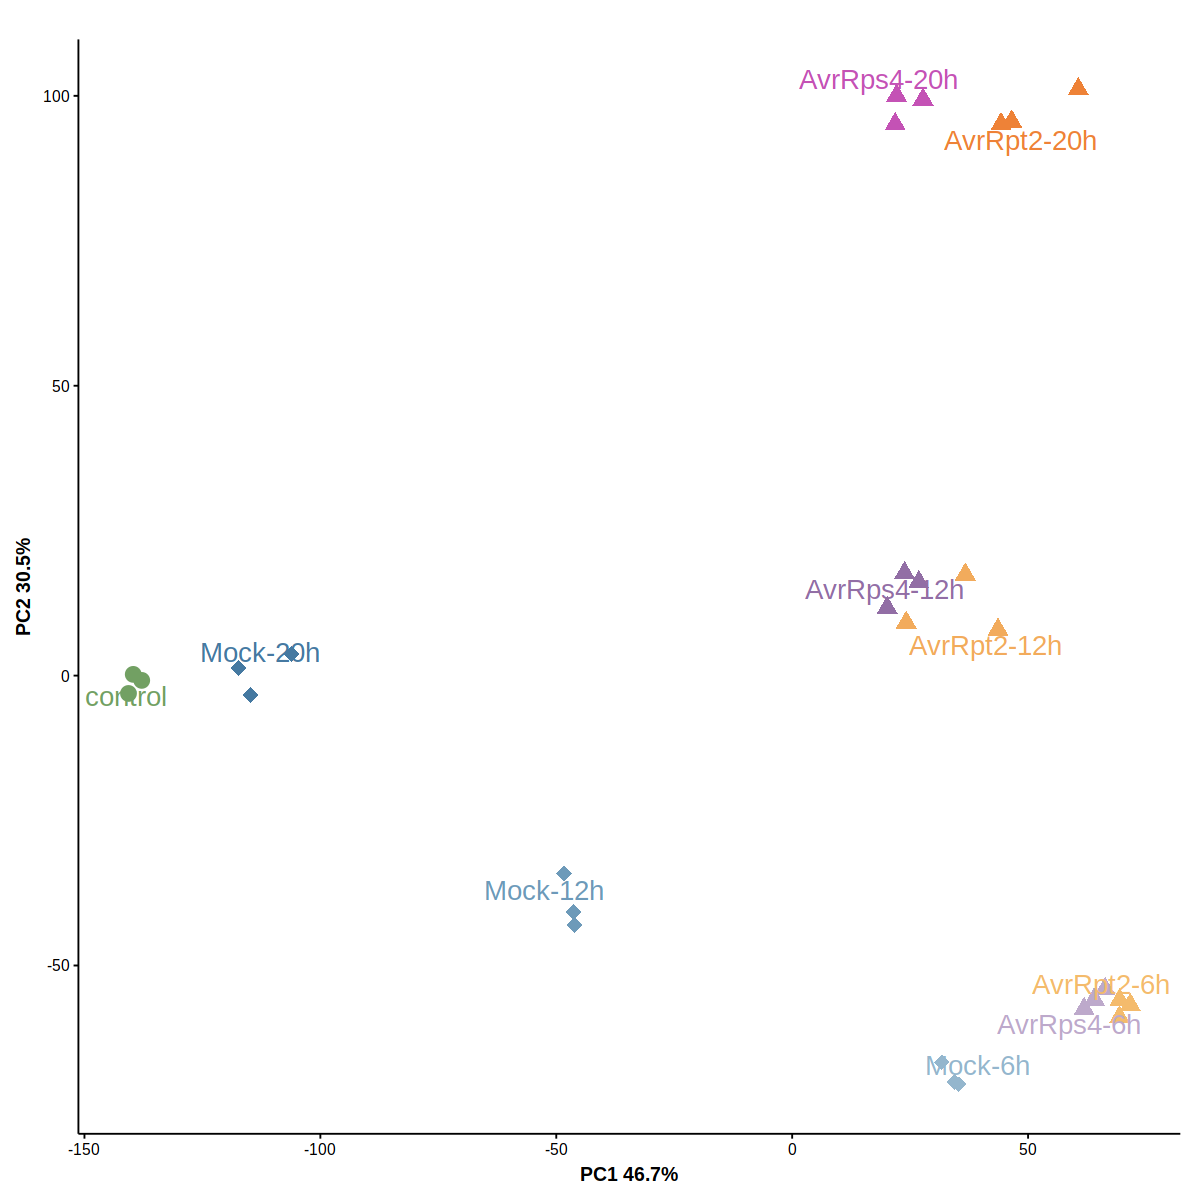

In [18]:
options(repr.plot.width=12, repr.plot.height=12, repr.plot.res = 100)
# Define custom colors for the groups
custom_colors <- c("control" = "#72A063",
                    "Mock-6h" = "#94B6CD", "Mock-12h" = "#6D9AB9", "Mock-20h" = "#4579A1", 
                   "AvrRps4-6h" = "#BDA9CB", "AvrRps4-12h" = "#926EA5", "AvrRps4-20h" = "#C452B5", 
                    "AvrRpt2-6h" = "#F4BB6C", "AvrRpt2-12h" = "#F2AB5C", "AvrRpt2-20h" = "#EE8237")
custom_shapes <- c('control' = 19, 'Mock' = 18, 'AvrRps4' = 17, 'AvrRpt2' = 17)

# Create the PCA plot
pca_gg <- ggplot(p_for_plot, aes(PC1, PC2, color = group, shape = treatment)) + 
  geom_jitter(size = 5, width = 1.5) +  
  xlab(paste0('PC1 ', p$variance[1] %>% round(1), '%')) + 
  ylab(paste0('PC2 ', p$variance[2] %>% round(1), '%'))+ 
  theme_Publication() +
  geom_text_repel(data = subset(p_for_plot, replicate == 1),
    aes(PC1, PC2, label = group3),  size = 7
  ) +
  scale_shape_manual(values = custom_shapes) +
  scale_color_manual(values = custom_colors) +
  theme_Publication() +  
  theme(legend.position = "none")

# Display the plot
pca_gg

ggsave(file = paste0("./plots/pca_gg", Sys.time(), ".pdf") , pca_gg, width = 6, height = 6)

In [19]:
options(repr.plot.width=16, repr.plot.height=9)
plotloadings(p,
    rangeRetain = 0.01,
    labSize = 4.0,
    title = 'Loadings plot',
    subtitle = 'PC1, PC2, PC3, PC4',
    caption = 'Top 1% variables',
    shape = 24,
    col = c('limegreen', 'black', 'red3'),
    drawConnectors = TRUE) %>% 
    ggsave(file = paste0("./plots/plotloadings", Sys.time(), ".pdf") , width = 10, height = 6)

-- variables retained:

AT4G21830, AT2G30750, AT2G15020, AT2G27420, AT2G24850, AT5G55150, AT2G05070, AT3G20810, AT2G26020, AT5G12030, AT4G31970, AT4G23560

Warning message:
“ggrepel: 3 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


In [20]:
options(repr.plot.width=16, repr.plot.height=12)
plotloadings(p, labSize = 3)  %>% 
    ggsave(file = paste0("./plots/plotloadings2", Sys.time(), ".pdf") , width = 10, height = 6)

-- variables retained:

AT4G21830, AT2G30750, AT2G26560, AT4G23700, AT2G15020, AT2G27420, AT2G40610, AT2G24850, AT3G11480, AT5G55150, AT5G59680, AT5G62480, AT3G54530, AT1G74870, AT2G05070, AT3G20810, AT4G25930, AT4G21490, AT2G27690, AT2G26020, AT5G12030, AT1G52560, AT4G31970, AT2G35980, AT3G09950, AT4G23560

Warning message:
“ggrepel: 8 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


## Volcano

In [21]:
## sample distance
options(repr.plot.width=14, repr.plot.height=14)
sampleDists <- dist(t(assay(vsd)))
library("RColorBrewer")
sampleDistMatrix <- as.matrix(sampleDists)

## Res by group

In [22]:
dds_group <- DESeqDataSetFromMatrix(countData, colData=sample_data, design= ~  group) 
dds_group <- dds_group[ rowSums(counts(dds_group)) > 5, ]
dds_group <- DESeq(dds_group)
dds_group

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

estimating size factors

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
 

class: DESeqDataSet 
dim: 25411 30 
metadata(1): version
assays(4): counts mu H cooks
rownames(25411): AT1G30814 AT1G78930 ... ATCG01180 ATCG00950
rowData names(54): baseMean baseVar ... deviance maxCooks
colnames(30): C-A C-B ... S20-B S20-C
colData names(6): sample hpi ... group sizeFactor

In [23]:
dds = dds_group

In [24]:
resultsNames(dds)
dds

[1] "Intercept"                        "group_AvrRps4.20h_vs_AvrRps4.12h"
 [3] "group_AvrRps4.6h_vs_AvrRps4.12h"  "group_AvrRpt2.12h_vs_AvrRps4.12h"
 [5] "group_AvrRpt2.20h_vs_AvrRps4.12h" "group_AvrRpt2.6h_vs_AvrRps4.12h" 
 [7] "group_control_vs_AvrRps4.12h"     "group_Mock.12h_vs_AvrRps4.12h"   
 [9] "group_Mock.20h_vs_AvrRps4.12h"    "group_Mock.6h_vs_AvrRps4.12h"

class: DESeqDataSet 
dim: 25411 30 
metadata(1): version
assays(4): counts mu H cooks
rownames(25411): AT1G30814 AT1G78930 ... ATCG01180 ATCG00950
rowData names(54): baseMean baseVar ... deviance maxCooks
colnames(30): C-A C-B ... S20-B S20-C
colData names(6): sample hpi ... group sizeFactor

In [25]:
timePoints <- sample_data %>% pull(hpi) %>% unique()
treatments <- sample_data %>% pull(treatment) %>% unique()
treatments
timePoints

[1] "control" "Mock"    "AvrRpt2" "AvrRps4"

[1]  0  6 12 20

In [26]:
treatments = c('AvrRpt2','AvrRps4')
timePoints = c(6, 12, 20)

In [27]:
sample_data %>% 
        subset( hpi == 20 &  treatment == 'AvrRpt2' ) %>% pull(group) %>% unique

[1] "AvrRpt2-20h"

In [28]:
### Loop over all genotypes to compute the results from the model ###
Res <- NULL
for(current_treatment in treatments){
  for(timePoint in timePoints){

    cat("Working on ", current_treatment ," vs Mock", timePoint,"h\n")
      
#       #Extract results from the model
    cat(current_treatment,'\t', timePoint, '\n' )
    mTest <- sample_data %>% 
        subset( hpi == timePoint &  treatment == current_treatment )   %>% 
          pull(group) %>% unique
    cat('mTest ', mTest, '\n')
    mControl <- sample_data %>% 
        subset( hpi == timePoint &  treatment == 'Mock' )  %$%
        group %>% as.character %>% unique

    mcontrast <- c("group",mTest,mControl)
    print(mcontrast)

      res <- results(object = dds,contrast = mcontrast,parallel = TRUE) %>% as.data.frame
      res$Gene <- rownames(res)  

      res$Contrast <- paste0(mcontrast[2],"_vs_",mcontrast[3])
      res$hpi <- timePoint
      res$treatment = current_treatment
      rownames(res) <- NULL
      Res <- rbind(Res,res)
    }
  }


Working on  AvrRpt2  vs Mock 6 h
AvrRpt2 	 6 
mTest  AvrRpt2-6h 
[1] "group"      "AvrRpt2-6h" "Mock-6h"   
Working on  AvrRpt2  vs Mock 12 h
AvrRpt2 	 12 
mTest  AvrRpt2-12h 
[1] "group"       "AvrRpt2-12h" "Mock-12h"   
Working on  AvrRpt2  vs Mock 20 h
AvrRpt2 	 20 
mTest  AvrRpt2-20h 
[1] "group"       "AvrRpt2-20h" "Mock-20h"   
Working on  AvrRps4  vs Mock 6 h
AvrRps4 	 6 
mTest  AvrRps4-6h 
[1] "group"      "AvrRps4-6h" "Mock-6h"   
Working on  AvrRps4  vs Mock 12 h
AvrRps4 	 12 
mTest  AvrRps4-12h 
[1] "group"       "AvrRps4-12h" "Mock-12h"   
Working on  AvrRps4  vs Mock 20 h
AvrRps4 	 20 
mTest  AvrRps4-20h 
[1] "group"       "AvrRps4-20h" "Mock-20h"   


In [29]:
treatments = c('AvrRpt2','AvrRps4', 'Mock')
timePoints = c(6, 12, 20)

In [30]:
### Loop over all genotypes to compute the results from the model ###

for(current_treatment in treatments){
  for(timePoint in timePoints){

    cat("Working on ", current_treatment ," vs control", timePoint,"h\n")
      
#       #Extract results from the model
    cat(current_treatment,'\t', timePoint, '\n' )
    mTest <- sample_data %>% 
        subset( hpi == timePoint &  treatment == current_treatment )   %>% 
          pull(group) %>% unique
    cat('mTest ', mTest, '\n')
    mControl <- sample_data %>% 
        subset( treatment == 'control' )  %$%
        group %>% as.character %>% unique

    mcontrast <- c("group",mTest,mControl)
    print(mcontrast)

      res <- results(object = dds,contrast = mcontrast,parallel = TRUE) %>% as.data.frame
      res$Gene <- rownames(res)
      res$Contrast <- paste0(mcontrast[2],"_vs_",mcontrast[3])
      res$hpi <- timePoint
      res$treatment = current_treatment
      rownames(res) <- NULL
      Res <- rbind(Res,res)
    }
  }


Working on  AvrRpt2  vs control 6 h
AvrRpt2 	 6 
mTest  AvrRpt2-6h 
[1] "group"      "AvrRpt2-6h" "control"   
Working on  AvrRpt2  vs control 12 h
AvrRpt2 	 12 
mTest  AvrRpt2-12h 
[1] "group"       "AvrRpt2-12h" "control"    
Working on  AvrRpt2  vs control 20 h
AvrRpt2 	 20 
mTest  AvrRpt2-20h 
[1] "group"       "AvrRpt2-20h" "control"    
Working on  AvrRps4  vs control 6 h
AvrRps4 	 6 
mTest  AvrRps4-6h 
[1] "group"      "AvrRps4-6h" "control"   
Working on  AvrRps4  vs control 12 h
AvrRps4 	 12 
mTest  AvrRps4-12h 
[1] "group"       "AvrRps4-12h" "control"    
Working on  AvrRps4  vs control 20 h
AvrRps4 	 20 
mTest  AvrRps4-20h 
[1] "group"       "AvrRps4-20h" "control"    
Working on  Mock  vs control 6 h
Mock 	 6 
mTest  Mock-6h 
[1] "group"   "Mock-6h" "control"
Working on  Mock  vs control 12 h
Mock 	 12 
mTest  Mock-12h 
[1] "group"    "Mock-12h" "control" 
Working on  Mock  vs control 20 h
Mock 	 20 
mTest  Mock-20h 
[1] "group"    "Mock-20h" "control" 


In [31]:
Res <- Res %>% dplyr::select(Gene, everything())

In [32]:
Res$hpi <- as.factor(Res$hpi)

## Valcano plots

In [33]:
constrasts <- Res %>% pull(Contrast) %>% unique() %>% sort() %>% c()

In [34]:
constrasts_mock <- constrasts[constrasts %>% str_detect('Mock')]

In [35]:
Res <- Res %>% left_join(map_id_name, by = c('Gene' = 'gene_id'))

In [36]:
plot_volcano <- function(Res_assay, title, subtitle = '') {

    plot <- EnhancedVolcano(
      Res_assay,
      lab = Res_assay$gene_name,
      x = 'log2FoldChange',
      y = 'pvalue',
     # xlim = c(-8, 8),
      #  ylim = c(-2, 80),
      pCutoff = 0.05,  # smaller can be labelled
      FCcutoff = 2,  # higher can be labelled
      title = title,
        pointSize = 1,
        subtitle = subtitle,
        labSize = 2,
        axisLabSize = 6
#       title = deparse(substitute(Res_assay))

)+ theme_Publication() + theme(legend.position = "none") + 
    theme(legend.position = "none",
              plot.title = element_text(size = 8, face = "bold"),
              plot.subtitle = element_text(size = 8),
              axis.title = element_text(size = 8),
              axis.text = element_text(size = 8))
    return(plot)
}

defaultW <- getOption("warn")
options(warn = -1)

AvrRps4_12h <- plot_volcano(Res %>% 
                            filter(Contrast == 'AvrRps4-12h_vs_Mock-12h'), title = 'AvrRps4-12h_vs_Mock-12h')
AvrRps4_6h <- plot_volcano(Res %>% filter(Contrast == 'AvrRps4-6h_vs_Mock-6h'), title = 'AvrRps4-6h_vs_Mock-6h')
AvrRps4_20h <- plot_volcano(Res %>% filter(Contrast == 'AvrRps4-20h_vs_Mock-20h'), title = 'AvrRps4-20h_vs_Mock-20h')
AvrRpt2_12h <- plot_volcano(Res %>% 
                            filter(Contrast == 'AvrRpt2-12h_vs_Mock-12h'), title = 'AvrRpt2-12h_vs_Mock-12h')
AvrRpt2_6h <- plot_volcano(Res %>% filter(Contrast == 'AvrRpt2-6h_vs_Mock-6h'), title = 'AvrRpt2-6h_vs_Mock-6h')
AvrRpt2_20h <- plot_volcano(Res %>% filter(Contrast == 'AvrRpt2-20h_vs_Mock-20h'), title = 'AvrRpt2-20h_vs_Mock-20h')

options(warn = defaultW)



xmin = -20
xmax = 20
options(repr.plot.width=30, repr.plot.height=15)
volcanos <- arrangeGrob(
   AvrRps4_6h + xlim(xmin, xmax) + ylab(label = element_blank()), 
    AvrRps4_12h + xlim(xmin, xmax) + ylab(label = element_blank()), 
    AvrRps4_20h + xlim(xmin, xmax) + ylab(label = element_blank()), 
    
    AvrRpt2_6h+ xlim(xmin, xmax) + ylab(label = element_blank()), 
    AvrRpt2_12h+ xlim(xmin, xmax) + ylab(label = element_blank()), 
    AvrRpt2_20h+ xlim(xmin, xmax) + ylab(label = element_blank()), 
     ncol = 3                      ) 
volcanos %>% ggsave(file = paste0("./plots/volcanos_", Sys.time(), ".pdf") , width = 8, height = 6)

Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Scale for x is already present.
Adding another scale for x, which will replace the existing scale.


In [37]:
library(extrafont) 
# font_import() # only run once
loadfonts()
loadfonts(device = "pdf") # Load the fonts for the PDF device

Registering fonts with R

aakar already registered with pdfFont().

Abyssinica SIL already registered with pdfFont().

Ani already registered with pdfFont().

AnjaliOldLipi already registered with pdfFont().

Chandas already registered with pdfFont().

DejaVu Sans already registered with pdfFont().

DejaVu Sans Mono already registered with pdfFont().

DejaVu Serif already registered with pdfFont().

Dhurjati already registered with pdfFont().

Droid Sans Fallback already registered with pdfFont().

Dyuthi already registered with pdfFont().

FreeMono already registered with pdfFont().

FreeSans already registered with pdfFont().

FreeSerif already registered with pdfFont().

Gargi already registered with pdfFont().

Garuda already registered with pdfFont().

Gidugu already registered with pdfFont().

Gubbi already registered with pdfFont().

Gurajada already registered with pdfFont().

Jamrul already registered with pdfFont().

KacstArt already registered with pdfFont().

KacstBook alre

## heatmap

In [38]:
z_assay <- ( vst - mean(vst) ) / sd(vst)

In [39]:
# Calculate the variance for each gene
variances <- apply(z_assay, 1, var)

# Determine the upper quartile variance cutoff value
upper_var <- quantile(variances, 0.9)
upper_var

90% 
0.1069002

In [40]:
df_by_var  <- data.frame(z_assay) %>%
  dplyr::filter(variances > upper_var)
df_by_var %>% nrow()
# df_by_var %>% str()

[1] 2541

In [41]:
pdf(file="./plots/Heatmap.pdf", width = 18, height = 12)
heatmap
dev.off()

png 
  2

In [42]:
png(file="./plots/heatmap.png", width = 18, height = 12)
heatmap
dev.off()

png 
  2

## DEG

In [43]:
Res_sig <- Res %>% filter(log2FoldChange %>% abs > 2, baseMean > 1, padj < 0.05) 
Res_sig %>% head(2)

,Gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Contrast,hpi,treatment,gene_name
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<fct>,<chr>,<chr>
1,AT1G53903,38.11016,2.878136,0.6265549,4.593589,4.356870e-06,6.050019e-05,AvrRpt2-6h_vs_Mock-6h,6,AvrRpt2,AT1G53903
2,AT1G49570,30.00035,3.917709,0.7561996,5.180787,2.209522e-07,4.257991e-06,AvrRpt2-6h_vs_Mock-6h,6,AvrRpt2,AT1G49570


In [44]:
Res_sig_AvrRpt2_6h_down <- Res_sig %>% filter( Contrast == 'AvrRpt2-6h_vs_Mock-6h', log2FoldChange < -2)
Res_sig_AvrRpt2_12h_down <- Res_sig %>% filter( Contrast == 'AvrRpt2-12h_vs_Mock-12h', log2FoldChange < -2)
Res_sig_AvrRpt2_20h_down <- Res_sig %>% filter( Contrast == 'AvrRpt2-20h_vs_Mock-20h', log2FoldChange < -2)
Res_sig_AvrRps4_6h_down <- Res_sig %>% filter( Contrast == 'AvrRps4-6h_vs_Mock-6h', log2FoldChange < -2)
Res_sig_AvrRps4_12h_down <- Res_sig %>% filter( Contrast == 'AvrRps4-12h_vs_Mock-12h', log2FoldChange < -2)
Res_sig_AvrRps4_20h_down <- Res_sig %>% filter( Contrast == 'AvrRps4-20h_vs_Mock-20h', log2FoldChange < -2)

Res_sig_AvrRpt2_6h_up <- Res_sig %>% filter( Contrast == 'AvrRpt2-6h_vs_Mock-6h', log2FoldChange > 2)
Res_sig_AvrRpt2_12h_up <- Res_sig %>% filter( Contrast == 'AvrRpt2-12h_vs_Mock-12h', log2FoldChange > 2)
Res_sig_AvrRpt2_20h_up <- Res_sig %>% filter( Contrast == 'AvrRpt2-20h_vs_Mock-20h', log2FoldChange > 2)
Res_sig_AvrRps4_6h_up <- Res_sig %>% filter( Contrast == 'AvrRps4-6h_vs_Mock-6h', log2FoldChange > 2)
Res_sig_AvrRps4_12h_up <- Res_sig %>% filter( Contrast == 'AvrRps4-12h_vs_Mock-12h', log2FoldChange > 2)
Res_sig_AvrRps4_20h_up <- Res_sig %>% filter( Contrast == 'AvrRps4-20h_vs_Mock-20h', log2FoldChange > 2)

In [45]:
AvrRpt2_down <- list('AvrRpt2_6h_down' = Res_sig_AvrRpt2_6h_down %>% pull(Gene) , 
               'AvrRpt2_12h_down' = Res_sig_AvrRpt2_12h_down %>% pull(Gene),
               'AvrRpt2_20h_down' = Res_sig_AvrRpt2_20h_down %>% pull(Gene))
AvrRps4_down <- list('AvrRps4_6h_down' = Res_sig_AvrRps4_6h_down %>% pull(Gene) , 
               'AvrRps4_12h_down' = Res_sig_AvrRps4_12h_down %>% pull(Gene),
               'AvrRps4_20h_down' = Res_sig_AvrRps4_20h_down %>% pull(Gene))

AvrRpt2_up <- list('AvrRpt2_6h_up' = Res_sig_AvrRpt2_6h_up %>% pull(Gene) , 
               'AvrRpt2_12h_up' = Res_sig_AvrRpt2_12h_up %>% pull(Gene),
               'AvrRpt2_20h_up' = Res_sig_AvrRpt2_20h_up %>% pull(Gene))
AvrRps4_up <- list('AvrRps4_6h_up' = Res_sig_AvrRps4_6h_up %>% pull(Gene) , 
               'AvrRps4_12h_up' = Res_sig_AvrRps4_12h_up %>% pull(Gene),
               'AvrRps4_20h_up' = Res_sig_AvrRps4_20h_up %>% pull(Gene))

In [46]:
AvrRpt2_AvrRps4_up_6h <- list('AvrRpt2_6h_up' = Res_sig_AvrRpt2_6h_up %>% pull(Gene) ,
                             'AvrRps4_6h_up' = Res_sig_AvrRps4_6h_up %>% pull(Gene)
                             )

AvrRpt2_AvrRps4_up_12h <- list('AvrRpt2_12h_up' = Res_sig_AvrRpt2_12h_up %>% pull(Gene),
                            'AvrRps4_12h_up' = Res_sig_AvrRps4_12h_up %>% pull(Gene)
                             )

AvrRpt2_AvrRps4_up_20h <- list('AvrRpt2_20h_up' = Res_sig_AvrRpt2_20h_up %>% pull(Gene),
                            'AvrRps4_20h_up' = Res_sig_AvrRps4_20h_up %>% pull(Gene)
                             )
AvrRpt2_AvrRps4_down_6h <- list('AvrRpt2_6h_down' = Res_sig_AvrRpt2_6h_down %>% pull(Gene) ,
                             'AvrRps4_6h_down' = Res_sig_AvrRps4_6h_down %>% pull(Gene)
                             )

AvrRpt2_AvrRps4_down_12h <- list('AvrRpt2_12h_down' = Res_sig_AvrRpt2_12h_down %>% pull(Gene),
                            'AvrRps4_12h_down' = Res_sig_AvrRps4_12h_down %>% pull(Gene)
                             )

AvrRpt2_AvrRps4_down_20h <- list('AvrRpt2_20h_down' = Res_sig_AvrRpt2_20h_down %>% pull(Gene),
                            'AvrRps4_20h_down' = Res_sig_AvrRps4_20h_down %>% pull(Gene)
                             )

In [47]:
library(VennDiagram)
futile.logger::flog.threshold(futile.logger::ERROR, name = "VennDiagramLogger") ##suppress the log file 
options(repr.plot.width=10, repr.plot.height=10)
## https://wemp.app/posts/4444f152-32e0-4618-89a4-66a146945410
plot_venn_three <- function (genes_list, main_title = '',  fill = c("green",  "#FB61D7", "#A58AFF")) {
    font_size = 1
    venn.diagram(genes_list, 
                          fill = fill,
                  alpha = c(0.5, 0.5,0.5), 
                 cat.cex = font_size, ## Vector giving the size for each category name
                  cex= 1.4,
                 filename=NULL,  
                 cat.dist = -0.05, # set name distanc to set
                  lty = 'blank', sub.fontfamily = "sans",
                              cat.fontfamily = "sans",
                    main =  main_title,
                        main.pos = c(0.5, 1), main.fontface = "plain",
                    main.fontfamily = "sans", main.col = "black",
                    main.cex = font_size, fontfamily = 'sans',
                  ggplot = T) 
}
Venn_AvrRpt2_down <-  plot_venn_three(AvrRpt2_down, main_title = 'AvrRpt2_down')
Venn_AvrRps4_down <- plot_venn_three(AvrRps4_down, main_title = 'AvrRps4_down')
Venn_AvrRpt2_up <-  plot_venn_three(AvrRpt2_up, main_title = 'AvrRpt2_up')
Venn_AvrRps4_up <- plot_venn_three(AvrRps4_up, main_title = 'AvrRps4_up')
arrangeGrob(Venn_AvrRpt2_down, Venn_AvrRps4_down, Venn_AvrRpt2_up, Venn_AvrRps4_up,
            ncol = 2)  %>%
    ggsave(file = paste0("./plots/venn_3_", Sys.time(), ".pdf") , width = 8.2, height = 8.2)

Loading required package: futile.logger



NULL

## Venn

In [48]:
options(repr.plot.width=20, repr.plot.height=8)
library(VennDiagram)

plot_venn_2 <- function (genes_list, main_title = '') {
  
  set_colors <- sapply(names(genes_list), function(x) {
    if (grepl("Rpt2", x)) {
      return("#F2AB5C")
    } else if (grepl("Rps4", x)) {
      return("#926EA5")
    } else {
      return("green")
    }
  })
  
    font_size = 1
  venn.diagram(genes_list,
               fill = set_colors,
               alpha = c(0.5, 0.5),
               cat.cex = font_size,
               cex= font_size,
               filename=NULL,
               cat.dist = 0,
               lty = 'blank',
               sub.fontfamily = "sans",
               cat.fontfamily = "sans",
               main = main_title,
               main.pos = c(0.5, 1),
               main.fontface = "plain",
               main.fontfamily = "sans",
               main.col = "black",
               main.cex = font_size,
               fontfamily = 'sans',
               ggplot = T,
                )
}

Venn_AvrRpt2_AvrRps4_up_6h <-  plot_venn_2(AvrRpt2_AvrRps4_up_6h , main_title = 'AvrRpt2_AvrRps4_up_6h')
Venn_AvrRpt2_AvrRps4_up_12h <-  plot_venn_2(AvrRpt2_AvrRps4_up_12h , main_title = 'AvrRpt2_AvrRps4_up_12h')
Venn_AvrRpt2_AvrRps4_up_20h <-  plot_venn_2(AvrRpt2_AvrRps4_up_20h , main_title = 'AvrRpt2_AvrRps4_up_20h')
Venn_AvrRpt2_AvrRps4_down_6h <-  plot_venn_2(AvrRpt2_AvrRps4_down_6h , main_title = 'AvrRpt2_AvrRps4_down_6h')
Venn_AvrRpt2_AvrRps4_down_12h <-  plot_venn_2(AvrRpt2_AvrRps4_down_12h , main_title = 'AvrRpt2_AvrRps4_down_12h')
Venn_AvrRpt2_AvrRps4_down_20h <-  plot_venn_2(AvrRpt2_AvrRps4_down_20h , main_title = 'AvrRpt2_AvrRps4_down_20h')

venn_plot <- arrangeGrob(Venn_AvrRpt2_AvrRps4_up_6h, Venn_AvrRpt2_AvrRps4_up_12h, Venn_AvrRpt2_AvrRps4_up_20h,
             Venn_AvrRpt2_AvrRps4_down_6h, Venn_AvrRpt2_AvrRps4_down_12h, Venn_AvrRpt2_AvrRps4_down_20h,
            ncol = 3)
venn_plot %>% ggsave(file = paste0("./plots/venn", Sys.time(), ".pdf") , width = 8.2, height = 6)

## write DEG to xlsx

In [49]:
DEG_list <- list('Res_sig_AvrRpt2_6h_down'  =   Res_sig_AvrRpt2_6h_down,
                'Res_sig_AvrRpt2_12h_down' =   Res_sig_AvrRpt2_12h_down,
                'Res_sig_AvrRpt2_20h_down' =   Res_sig_AvrRpt2_20h_down,
                'Res_sig_AvrRps4_6h_down'  =   Res_sig_AvrRps4_6h_down,
                'Res_sig_AvrRps4_12h_down' =   Res_sig_AvrRps4_12h_down,
                'Res_sig_AvrRps4_20h_down' =   Res_sig_AvrRps4_20h_down,
                'Res_sig_AvrRpt2_6h_up'    =   Res_sig_AvrRpt2_6h_up,
                'Res_sig_AvrRpt2_12h_up'   =   Res_sig_AvrRpt2_12h_up,
                'Res_sig_AvrRpt2_20h_up'   =   Res_sig_AvrRpt2_20h_up,
                'Res_sig_AvrRps4_6h_up'    =   Res_sig_AvrRps4_6h_up,
                'Res_sig_AvrRps4_12h_up'   =   Res_sig_AvrRps4_12h_up,
                'Res_sig_AvrRps4_20h_up'    =   Res_sig_AvrRps4_20h_up)

In [50]:
require(openxlsx)

Loading required package: openxlsx



In [51]:
write.xlsx(DEG_list, file = "./tables/hisat_DEG.xlsx", overwrite = T)

## goprofiler2

In [52]:
library('DOSE')
library("clusterProfiler")
library(gprofiler2)

DOSE v3.24.0  For help: https://yulab-smu.top/biomedical-knowledge-mining-book/

If you use DOSE in published research, please cite:
Guangchuang Yu, Li-Gen Wang, Guang-Rong Yan, Qing-Yu He. DOSE: an R/Bioconductor package for Disease Ontology Semantic and Enrichment analysis. Bioinformatics 2015, 31(4):608-609


clusterProfiler v4.6.0  For help: https://yulab-smu.top/biomedical-knowledge-mining-book/

If you use clusterProfiler in published research, please cite:
T Wu, E Hu, S Xu, M Chen, P Guo, Z Dai, T Feng, L Zhou, W Tang, L Zhan, X Fu, S Liu, X Bo, and G Yu. clusterProfiler 4.0: A universal enrichment tool for interpreting omics data. The Innovation. 2021, 2(3):100141


Attaching package: ‘clusterProfiler’


The following object is masked from ‘package:IRanges’:

    slice


The following object is masked from ‘package:S4Vectors’:

    rename


The following object is masked from ‘package:stats’:

    filter




https://yulab-smu.top/biomedical-knowledge-mining-book/clusterprofiler-comparecluster.html

In [53]:
ups <- list( 'AvrRpt2_6h' = Res_sig_AvrRpt2_6h_up %>% pull(Gene),
    'AvrRps4_6h' = Res_sig_AvrRps4_6h_up %>% pull(Gene),
     'AvrRpt2_12h' = Res_sig_AvrRpt2_12h_up %>% pull(Gene),
    'AvrRps4_12h' = Res_sig_AvrRps4_12h_up %>% pull(Gene),
     'AvrRpt2_20h' = Res_sig_AvrRpt2_20h_up %>% pull(Gene),
    'AvrRps4_20h' = Res_sig_AvrRps4_20h_up %>% pull(Gene)
     )

In [54]:
downs <- list( 'AvrRpt2_6h' = Res_sig_AvrRpt2_6h_down %>% pull(Gene),
    'AvrRps4_6h' = Res_sig_AvrRps4_6h_down %>% pull(Gene),
     'AvrRpt2_12h' = Res_sig_AvrRpt2_12h_down %>% pull(Gene),
    'AvrRps4_12h' = Res_sig_AvrRps4_12h_down %>% pull(Gene),
     'AvrRpt2_20h' = Res_sig_AvrRpt2_20h_down %>% pull(Gene),
    'AvrRps4_20h' = Res_sig_AvrRps4_20h_down %>% pull(Gene)
     )

In [55]:
GO_up = gost(ups,   organism = "athaliana", 
             sources = c("GO:BP", "GO:MF", "GO:CC", "KEGG"), multi_query = FALSE, evcodes = TRUE)

In [56]:
GO_down = gost(downs,   organism = "athaliana", 
             sources = c("GO:BP", "GO:MF", "GO:CC", "KEGG"), multi_query = FALSE, evcodes = TRUE)

In [57]:
GOs <- GO_up$result %>% mutate(up_down = 'Up') %>% 
    rbind(GO_down$result %>% mutate(up_down = 'Down'))
 GOs %>%  group_by(up_down, source) %>% summarize(n = n())

`summarise()` has grouped output by 'up_down'. You can override using the
`.groups` argument.


up_down,source,n
<chr>,<chr>,<int>
Down,GO:BP,112
Down,GO:CC,29
Down,GO:MF,19
Down,KEGG,22
Up,GO:BP,746
Up,GO:CC,43
Up,GO:MF,186
Up,KEGG,40


In [58]:
GOs %>% names

[1] "query"                 "significant"           "p_value"              
 [4] "term_size"             "query_size"            "intersection_size"    
 [7] "precision"             "recall"                "term_id"              
[10] "source"                "term_name"             "effective_domain_size"
[13] "source_order"          "parents"               "evidence_codes"       
[16] "intersection"          "up_down"

In [59]:
gp_mod = GOs[,c("query", "source", "term_id",
                                "term_name", "p_value", "query_size", 
                                "intersection_size", "term_size", 
                                "effective_domain_size" , 'intersection', 'up_down')]
# names(gp_mod)
# gp_mod
gp_mod$GeneRatio = paste0(gp_mod$intersection_size,  "/", gp_mod$query_size)
gp_mod$BgRatio = paste0(gp_mod$term_size, "/", gp_mod$effective_domain_size)
names(gp_mod)
names(gp_mod) = c("Cluster", "Category", "ID", "Description", "p.adjust", 
                    "query_size", "Count", "term_size", "effective_domain_size", 
                    "geneID", 'up_down', "GeneRatio", "BgRatio")
gp_mod$geneID = gsub(",", "/", gp_mod$geneID)
gp_mod %>% nrow()
# gp_mod <- gp_mod %>% mutate(Cluster =  str_replace_all(Cluster, "/", "/\n"))
GO_result <- gp_mod %>%
  mutate(hpi = str_extract(Cluster, '\\d{1,2}h$'),
         treatment = str_extract(Cluster, '^Avr\\w{3}\\d')) %>%
  mutate(hpi = factor(hpi, levels = c('6h', '12h', '20h'))) 

[1] "query"                 "source"                "term_id"              
 [4] "term_name"             "p_value"               "query_size"           
 [7] "intersection_size"     "term_size"             "effective_domain_size"
[10] "intersection"          "up_down"               "GeneRatio"            
[13] "BgRatio"

[1] 1197

In [60]:
up_include_terms <- c('response to salicylic acid', 'response to jasmonic acid',
                      'response to chitin', 'response to bacterium', 'response to abscisic acid',
                      'regulation of systemic acquired resistance', 'regulation of jasmonic acid mediated signaling pathway', 
                      'regulation of cell death', 'programmed cell death', 
                     'innate immune response', 'defense response',
                        'auxin metabolic process', 'jasmonic acid metabolic process', 'leaf senescence',
                      'reactive oxygen species metabolic process', 'xenobiotic transport', 'response to hypoxia',
                      
                      'plasma membrane',  'extracellular region','vacuole', 'secretory vesicle',
                      
                      'xenobiotic transmembrane transporter activity', 'transmembrane transporter activity', 
                      'NADH dehydrogenase activity', 'dioxygenase activity', 'chlorophyll binding'
                      
                      # 'MAPK signaling pathway − plant', 'Plant−pathogen interaction', 
                  )
# Create a pattern using the OR (|) operator, and add start-of-line (^) and end-of-line ($) anchors to each term
up_include_terms_pattern <- paste0("(?i)^(", paste(up_include_terms, collapse = "|"), ")$")
# up_include_terms_pattern


In [61]:
down_include_terms <- c(
    'Phloem or xylem histogenesis', 'Photosynthesis', 'Hormone−mediated signaling pathway', 'Developmental process',
    'Response to hormone', 'Cellular response to auxin stimulus', 'Auxin−activated signaling pathway',
    'Response to organic substance', 'Cell communication', 'Meristem maintenance', 'Response to red or far red light',
    'Tissue development', 'Wax metabolic process', 'Multicellular organismal process', 'Lipid catabolic process',
    
    'Thylakoid membrane', 'Plasma membrane', 'Photosystem', 'Extracellular region', 'Apoplast', 'Plastoglobule',
    
    'Xyloglucan:xyloglucosyl transferase activity',  'Polysaccharide binding', 'Lyase activity'
 
                  )
# Create a pattern using the OR (|) operator, and add start-of-line (^) and end-of-line ($) anchors to each term
down_include_terms_pattern <- paste0("(?i)^(", paste(down_include_terms, collapse = "|"), ")$")
# down_include_terms_pattern


In [62]:
options(repr.plot.width=20, repr.plot.height=12)


library(grid)
library(gridExtra)
library(ggh4x)

# Function to create a customized dot plot
customize_dotplot <- function(data,
                              description_width = 40,
                              low_color = "#fe6865",
                              high_color = "#0fc3c7",
                              text_size = 8,
                              panel_spacing_y = 0.05,
                              plot_title = "Customized Dot Plot") {
  
  # Wrap the Description text to a fixed width
  data$Description <- str_wrap(data$Description, width = description_width)
  
  # Calculate the proportions of unique Descriptions for each Category
  category_proportions <- data %>%
    group_by(Category) %>%
    summarise(n_unique_descriptions = n_distinct(Description)) %>%
    mutate(proportion = n_unique_descriptions / sum(n_unique_descriptions)) %>%
    pull(proportion)
    
  # Create the customized dot plot
  go_plot <- ggplot(data, aes(x = treatment, y = reorder(Description, `p.adjust`), , size = Count/query_size, color = `p.adjust`)) +
    geom_point() +
    scale_color_gradient(low = low_color, high = high_color) +
    facet_grid(Category ~ hpi , scales = "free_y", #switch = "y", 
               labeller = label_wrap_gen(width = description_width, multi_line = T)) +
    labs(title = plot_title,
         x = NULL, # Remove x-axis title
         y = NULL, # Remove y-axis title
         size = "Gene Ratio",
         color = "p.adjust") +
    theme_minimal() +
    theme(
      text = element_text(size = text_size, color = "black"),
      plot.title = element_text(size = text_size, color = "black"), # Set plot title font size
      legend.text = element_text(size = text_size, color = "black"), # Set legend font size
      strip.background = element_rect(fill = "grey80"),
      panel.border = element_rect(colour = "black", fill = NA, linewidth = 1),
      panel.spacing.y = unit(panel_spacing_y, "lines"), # Set space between facets
      legend.margin = margin(0, -10, 0, 0), # Reduced space between legend and plot
      axis.text.y = element_text(face = "bold"), # Bold Description
    axis.text.x = element_text(face = "bold"), # Bold Cluster
      strip.text.y = element_text(face = "bold") # Bold facet name
        
    ) + 
    guides(size = guide_legend(order = 0),
           color = guide_colourbar( order = 1)) +

    force_panelsizes(rows = category_proportions) 
  return(go_plot)
}

# Call the function with the data object
go_up_plot <- GO_result %>% filter(up_down == 'Up') %>%
    filter(str_detect(Description, up_include_terms_pattern)) %>%
    mutate(Description = stringr::str_replace(Description, "^\\w", stringr::str_to_title)) %>% 
    mutate(treatment = treatment %>% str_remove('Avr')) %>%  ## AvrRtp2 is too long as x-axis label
    customize_dotplot(plot_title = 'Up DEG')

go_down_plot <- GO_result %>% filter(up_down == 'Down') %>%
    filter(str_detect(Description, down_include_terms_pattern)) %>%
    mutate(Description = stringr::str_replace(Description, "^\\w", stringr::str_to_title)) %>% 
        mutate(treatment = treatment %>% str_remove('Avr')) %>% ## AvrRtp2 is too long as x-axis label
    customize_dotplot(plot_title = 'Down DEG')

# ggsave(paste0("./plots/up_",  Sys.time(), ".pdf"),
#        go_up_plot, width = 4.3, height = 6, units = "in", dpi = 300)

# ggsave(paste0("./plots/down_",  Sys.time(), ".pdf"),
#        go_down_plot, width = 4.3, height = 6, units = "in", dpi = 300)
# Combine the plots and save to a single PDF
# combined_plot <- grid.arrange(go_up_plot, go_down_plot, ncol = 2
#                               #top = textGrob("GO Results", gp = gpar(fontsize = 14, fontface = "bold"))
#                              )

combined_plot <- arrangeGrob(go_up_plot, go_down_plot, ncol = 2
                              #top = textGrob("GO Results", gp = gpar(fontsize = 14, fontface = "bold"))
                             )

ggsave(paste0("./plots/up_down_combined_",  Sys.time(), ".pdf"),
       combined_plot, width = 8.3, height = 11.7/2.5, units = "in", dpi = 300)

# NLRs

In [63]:
Res

Gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Contrast,hpi,treatment,gene_name
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<fct>,<chr>,<chr>
AT1G30814,49.195271,-0.829686864,1.73204772,-0.47902079,6.319238e-01,7.855322e-01,AvrRpt2-6h_vs_Mock-6h,6,AvrRpt2,AT1G30814
AT1G78930,588.554366,-0.011894928,0.16141488,-0.07369164,9.412557e-01,9.717181e-01,AvrRpt2-6h_vs_Mock-6h,6,AvrRpt2,AT1G78930
AT1G71695,4433.623286,-0.098855557,0.07110892,-1.39019901,1.644685e-01,3.349229e-01,AvrRpt2-6h_vs_Mock-6h,6,AvrRpt2,AT1G71695
AT1G58983,45.117902,0.083782797,0.31066701,0.26968682,7.874012e-01,8.839580e-01,AvrRpt2-6h_vs_Mock-6h,6,AvrRpt2,AT1G58983
AT1G12980,7.460745,-2.460711255,1.14448103,-2.15006732,3.154989e-02,1.011066e-01,AvrRpt2-6h_vs_Mock-6h,6,AvrRpt2,ESR1
AT1G56250,138.159264,0.254901801,0.33659469,0.75729597,4.488726e-01,6.408457e-01,AvrRpt2-6h_vs_Mock-6h,6,AvrRpt2,PP2-B14
AT1G69810,338.196167,0.661998002,0.24079084,2.74926572,5.972894e-03,2.803369e-02,AvrRpt2-6h_vs_Mock-6h,6,AvrRpt2,WRKY36
AT1G72450,11513.685402,1.784604326,0.09144693,19.51519037,8.156474e-85,4.377580e-81,AvrRpt2-6h_vs_Mock-6h,6,AvrRpt2,JAZ6
AT1G76280,822.768262,-0.340306572,0.09579234,-3.55254468,3.815242e-04,2.866840e-03,AvrRpt2-6h_vs_Mock-6h,6,AvrRpt2,AT1G76280


In [64]:
NLRs_table <- openxlsx::read.xlsx('../gene_table_and_other_scripts//NLRs_167.xlsx') 

In [65]:
Res_NLRs <- Res %>% left_join(NLRs_table %>% select(AGI, Class, Organization, Symbol),
    by = c('Gene' = 'AGI')) %>% filter(Symbol != 'NA')
Res_NLRs_up <- Res_NLRs %>% filter(log2FoldChange >2, padj < 0.05, baseMean > 5)

In [66]:
# Define the color palette
cols <- c('TIR-NBS-LRR' = "#386cb0",
          'TIR'= "#a6cee3", "TIR-NBS" = "#2581ba",
          "CC-NBS-LRR" = "#fdb462",'CC-NBS' =  "#fb9a99", 'RPW8-NBS-LRR' = "#984ea3",
          'NBS-LRR' = "#ffff33",
          'P-loop' = "#7fc97f"
         )

# Define y-axis limits
ymax = 11
ymin = -5


In [67]:
filtered_data <- Res %>%
  filter(!str_detect(Contrast, 'control')) %>%
  select(Contrast) %>%
  unique()
filtered_data %>% c()

$Contrast
[1] "AvrRpt2-6h_vs_Mock-6h"   "AvrRpt2-12h_vs_Mock-12h"
[3] "AvrRpt2-20h_vs_Mock-20h" "AvrRps4-6h_vs_Mock-6h"  
[5] "AvrRps4-12h_vs_Mock-12h" "AvrRps4-20h_vs_Mock-20h"

In [68]:
library(gridExtra)

# Set plot dimensions and resolution
options(repr.plot.width=18, repr.plot.height=6, repr.plot.res = 140)

# Define the function
create_NLRs_plot <- function(line_value, ymin, ymax, cols) {
    plot.margin = 0.1
    print(line_value)
  ggplot(
    Res_NLRs %>% filter(Contrast == line_value),
    aes(x = gene_name, y = log2FoldChange)
  ) +
    aes(x = reorder(Gene, -log2FoldChange)) +
    geom_bar(stat = 'identity', aes(fill = Class), width = 1) +
    theme_Publication(base_size = 10) + theme(axis.text.x = element_blank()) + #hide x label
    xlab(label = line_value) +
    ylim(ymin, ymax) + ylab(label = element_blank()) + geom_hline(yintercept = 2, linetype = 'dashed', col = '#5d606e') +
    scale_y_continuous(limits = c(-5, 11), breaks = c(-5, -2, 2, 5, 10)) + scale_fill_manual(values = cols) +
    theme(plot.margin = margin(t = plot.margin, r = plot.margin, b = plot.margin, l = plot.margin, unit = "cm")) +
    theme(axis.ticks.x = element_blank())
}

# Get unique line values
unique_Contrast <- c('AvrRpt2-6h_vs_Mock-6h', 'AvrRpt2-12h_vs_Mock-12h', 'AvrRpt2-20h_vs_Mock-20h',
                     'AvrRps4-6h_vs_Mock-6h', 'AvrRps4-12h_vs_Mock-12h','AvrRps4-20h_vs_Mock-20h')

# Create a list to store the plots
plot_list <- list()

# Iterate through unique line values
for (i in seq_along(unique_Contrast)) {
    print(unique_Contrast[i])
  plot_list[[i]] <- create_NLRs_plot(unique_Contrast[i], ymin, ymax, cols)
}

# Arrange the plots in one row with three columns and control the space between the plots
NLRs_bar_plot <- arrangeGrob(grobs = plot_list,  ncol = 3)

# Save the plot as a PDF
ggsave(file = paste0("./plots/NLRs_bar_plot", Sys.time(), ".pdf"), plot = NLRs_bar_plot, width = 8.3, height = 6)


[1] "AvrRpt2-6h_vs_Mock-6h"
[1] "AvrRpt2-6h_vs_Mock-6h"


Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


[1] "AvrRpt2-12h_vs_Mock-12h"
[1] "AvrRpt2-12h_vs_Mock-12h"


Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


[1] "AvrRpt2-20h_vs_Mock-20h"
[1] "AvrRpt2-20h_vs_Mock-20h"


Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


[1] "AvrRps4-6h_vs_Mock-6h"
[1] "AvrRps4-6h_vs_Mock-6h"


Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


[1] "AvrRps4-12h_vs_Mock-12h"
[1] "AvrRps4-12h_vs_Mock-12h"


Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


[1] "AvrRps4-20h_vs_Mock-20h"
[1] "AvrRps4-20h_vs_Mock-20h"


Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


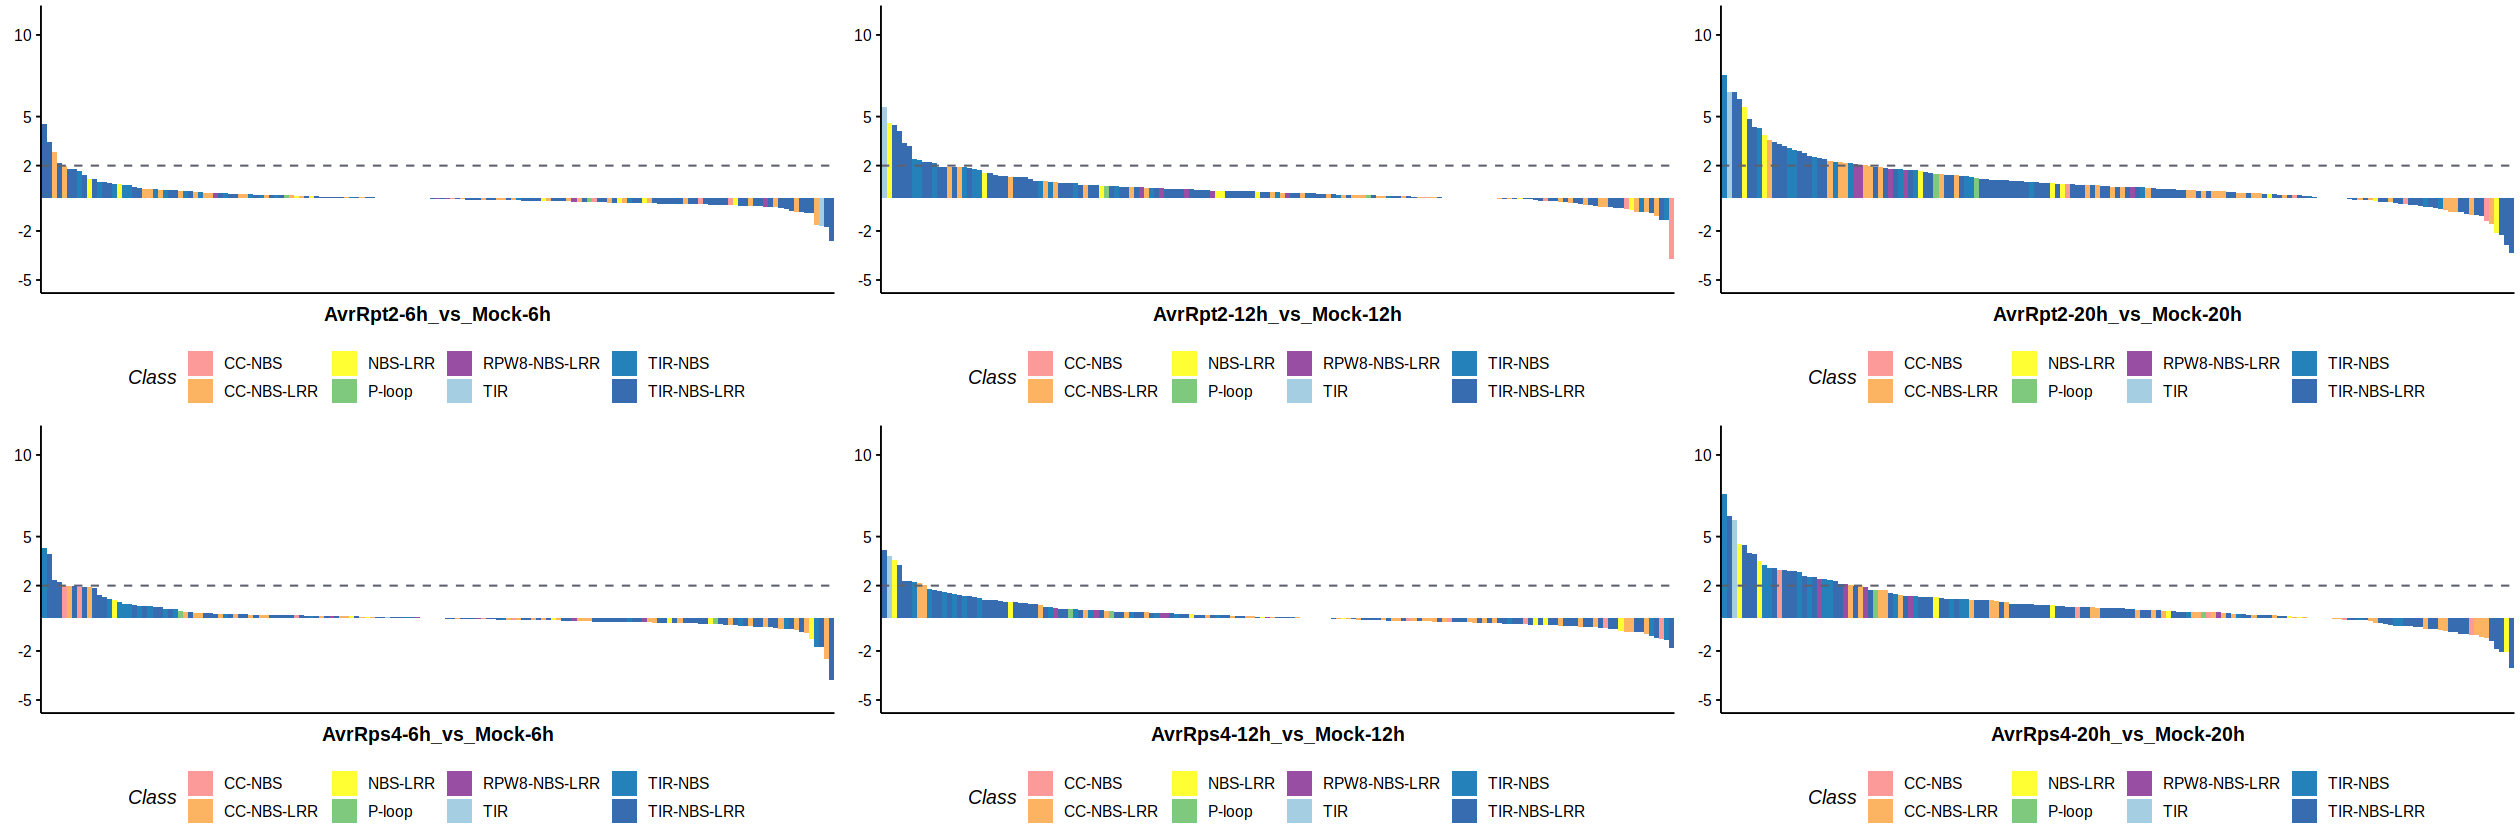

In [76]:
NLRs_bar_plot %>% plot

In [69]:
Res_NLRs_up %>% mutate(test = Contrast %>% str_remove('_vs_Mock-\\d{1,2}h$'), control = )

ERROR: Error in is_data_pronoun(expr): argument "expr" is missing, with no default


In [70]:
up_NLRs <-  list( 
    'DM6/7' = Res_NLRs_up %>% filter(line == 'DM6/DM7') %>% pull(AGI),
    'DM1/2d' = Res_NLRs_up %>% filter(line == 'DM1/DM2d') %>% pull(AGI),
    'DM10/11' = Res_NLRs_up %>% filter(line == 'DM10/DM11') %>% pull(AGI)
    )

ERROR: [1m[33mError[39m in `filter()`:[22m
[1m[22m[33m![39m Problem while computing `..1 = line == "DM6/DM7"`.
[1mCaused by error in `line == "DM6/DM7"`:[22m
[33m![39m comparison (==) is possible only for atomic and list types


In [ ]:
up_venn_shoot <- VennDiagram::venn.diagram(up_NLRs, fill = c("#F8766D",  "#FB61D7", "#A58AFF"),
                  alpha = c(0.5, 0.5,0.5), cat.cex = 2, ## Vector giving the size for each category name
                  cex=2,filename=NULL,  cat.dist = 0.06, # set name distanc to set
                  lty = 'blank', sub.fontfamily = "Helvetica",
                              cat.fontfamily = "Helvetica",
                    main = 'Up-regualted NLRs in Shoot',
                        main.pos = c(0.5, 1.05), main.fontface = "plain",
                    main.fontfamily = "Helvetica", main.col = "black",
                    main.cex = 2.4, fontfamily = 'Helvetica',
                  ggplot = T) 

# grid.newpage()
# grid.draw(up_venn_shoot)

pdf(file = paste0("./plots/venn_NLRs", Sys.time(), ".pdf") , width = 6, height = 6)
grid.newpage()
grid.draw(up_venn_shoot)
dev.off()

## plot the DEG of time course

In [ ]:
dds_counts_long <- counts(dds, normalized = TRUE) %>% as.data.frame %>% tibble::rownames_to_column("Gene") %>% 
    tidyr::pivot_longer(cols = 2:length(.), names_to = 'sample', values_to = 'counts')
dds_counts_long <- dds_counts_long %>% left_join(sample_data, by = 'sample')

dds_counts_long <- dds_counts_long %>% left_join(Orths, by = c('Gene' = 'BrapaLocus')) %>% 
    left_join(map_id_name, by = c('AtLocus' = 'gene_id')) %>% 
     mutate(label = paste0(gene_name, '_', AtLocus, '_', Gene) %>% str_remove_all('NA') %>% 
               str_remove_all('^_') %>%   str_remove_all('^_')) %>% 
    mutate(label = label %>%  str_remove('^AT\\dG\\d{5}_'))

dds_counts_long <- dds_counts_long %>% mutate(time =  group %>% str_extract('\\d{1,2}$') %>% as.numeric)

In [ ]:
dds_counts_long <- dds_counts_long %>% left_join (
    dds_counts_long %>% group_by(group, Gene) %>% summarise(mean_counts = mean(counts), sd=sd(counts)),
    by = c('group' = 'group', 'Gene' = 'Gene'))

In [ ]:
dds_counts_long <- dds_counts_long %>% mutate(line_treatment = group %>% str_remove('\\d{1,2}$'))

In [ ]:
dds_counts_long$label2 <- dds_counts_long$label %>% str_replace_all('_', "\n")

In [ ]:
dds_counts_long %>% saveRDS('./hisat2_featurecounts_deseq2/Rds_Rdata/dds_counts_long.rds')

In [ ]:
options(repr.plot.width=18, repr.plot.height=12)

plot_counts <- function (counts_table, ncol =5) {
    plot <- counts_table %>% ggplot(  aes(x = time, y = counts, colour  = line_treatment, group = line_treatment)) + 
     geom_line( aes( y= counts), stat = 'summary', fun = 'mean')  + 
    geom_point( )  + 
    geom_ribbon(aes(ymin = mean_counts - sd   , ymax = mean_counts + sd, fill  = line_treatment), color = NA,alpha = 0.2) +
    scale_color_manual(values = c('B10-C' = '#2eb053', 'B10-H' = '#e35b40', 'B11-C' = '#5ceded', 'B11-H' = '#c45ced'  )) +
    ggh4x::facet_wrap2(vars(label2),  ncol = ncol , scales = "free_y",  #independent = "y" ,
                       labeller = labeller( multi_line = TRUE, sep = "_"))  +
    scale_x_continuous(breaks = c(0, 3, 12, 24)) +
    theme_Publication() 
    return(plot)
}
    

In [ ]:
library(ggforce)

## save environment

In [71]:
save.image('./Rds_Rdata_hisat2/hisat.Rdata')

In [ ]:
load('./Rds_Rdata_hisat2/hisat.Rdata')

In [74]:
Res %>% saveRDS(file = paste0("./Rds_Rdata_hisat2/Res", Sys.time(), ".rdata"))